# **Clustering the countries needing international AID with R**
## Created by **Ramses Alexander Coraspe Valdez**
## Created on July 17, 2020

## Installing libraries

In [233]:
# install.packages("tidyverse")
# install.packages("cluster")
# install.packages("factoextra")
# install.packages("corrplot")
# install.packages("party")
library(party)
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization
library(corrplot)

In [234]:
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x)))
}

# **Checking the data**

In [235]:
countries.data <- read.csv("datasets_Country_data.csv", stringsAsFactors = F)
countries.dict <- read.csv("countries_dict.csv", stringsAsFactors = F)

countries.data <- transform(countries.data, income   = as.numeric(income), gdpp = as.numeric(gdpp))

head(countries.data,10)                                                                  
head(countries.dict,20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
2,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
3,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
4,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
6,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
7,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
8,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
9,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900


,Column.Name,Description
,<chr>,<chr>
1,country,Name of the country
2,child_mort,Death of children under 5 years of age per 1000 live births
3,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
4,health,Total health spending per capita. Given as %age of GDP per capita
5,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
6,Income,Net income per person
7,Inflation,The measurement of the annual growth rate of the Total GDP
8,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
9,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


In [236]:
countries <- countries.data$country  
countries.data$country =  NULL

countries.datan <- scale(countries.data)

row.names(countries.datan) <- countries
head(countries.datan,10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Afghanistan,1.28765971,-1.13486665,0.27825140,-0.08220771,-0.80582187,0.156864451,-1.6142372,1.89717646,-0.67714308
Albania,-0.53733286,-0.47822017,-0.09672528,0.07062429,-0.37424335,-0.311410892,0.6459238,-0.85739418,-0.48416709
Algeria,-0.27201464,-0.09882442,-0.96317624,-0.63983800,-0.22018227,0.786907640,0.6684130,-0.03828924,-0.46398018
Angola,2.00178723,0.77305618,-1.44372888,-0.16481961,-0.58328920,1.382894441,-1.1756985,2.12176975,-0.51472026
Antigua and Barbuda,-0.69354825,0.16018613,-0.28603389,0.49607554,0.10142673,-0.599944185,0.7021467,-0.54032130,-0.04169175
Argentina,-0.58940465,-0.81019144,0.46756001,-1.27594958,0.08067776,1.240992822,0.5897009,-0.38178486,-0.14535428
Armenia,-0.50013871,-0.74087876,-0.87944359,-0.06568534,-0.54179126,-0.001119352,0.3085863,-0.83097144,-0.53163362
Australia,-0.82992677,-0.77735912,0.69691468,-1.07355044,1.25818167,-0.626432487,1.2868650,-0.67243500,2.12430964
Austria,-0.84232482,0.37177222,1.52331959,0.03757953,1.35155202,-0.653582997,1.1181962,-0.99611356,1.85151350
Azerbaijan,0.02305888,0.48121330,-0.34064215,-1.08181163,-0.05937777,0.569325158,-0.1636861,-0.67904068,-0.38868844


# **Checking the correlations**

$r
           inflation child_mort total_fer exports imports health life_expec
inflation       1.00       0.29      0.32   -0.11  -0.250 -0.260     -0.240
child_mort      0.29       1.00      0.85   -0.32  -0.130 -0.200     -0.890
total_fer       0.32       0.85      1.00   -0.32  -0.160 -0.200     -0.760
exports        -0.11      -0.32     -0.32    1.00   0.740 -0.110      0.320
imports        -0.25      -0.13     -0.16    0.74   1.000  0.096      0.054
health         -0.26      -0.20     -0.20   -0.11   0.096  1.000      0.210
life_expec     -0.24      -0.89     -0.76    0.32   0.054  0.210      1.000
income         -0.15      -0.52     -0.50    0.52   0.120  0.130      0.610
gdpp           -0.22      -0.48     -0.45    0.42   0.120  0.350      0.600
           income  gdpp
inflation   -0.15 -0.22
child_mort  -0.52 -0.48
total_fer   -0.50 -0.45
exports      0.52  0.42
imports      0.12  0.12
health       0.13  0.35
life_expec   0.61  0.60
income       1.00  0.90
gdpp         0.90  1.

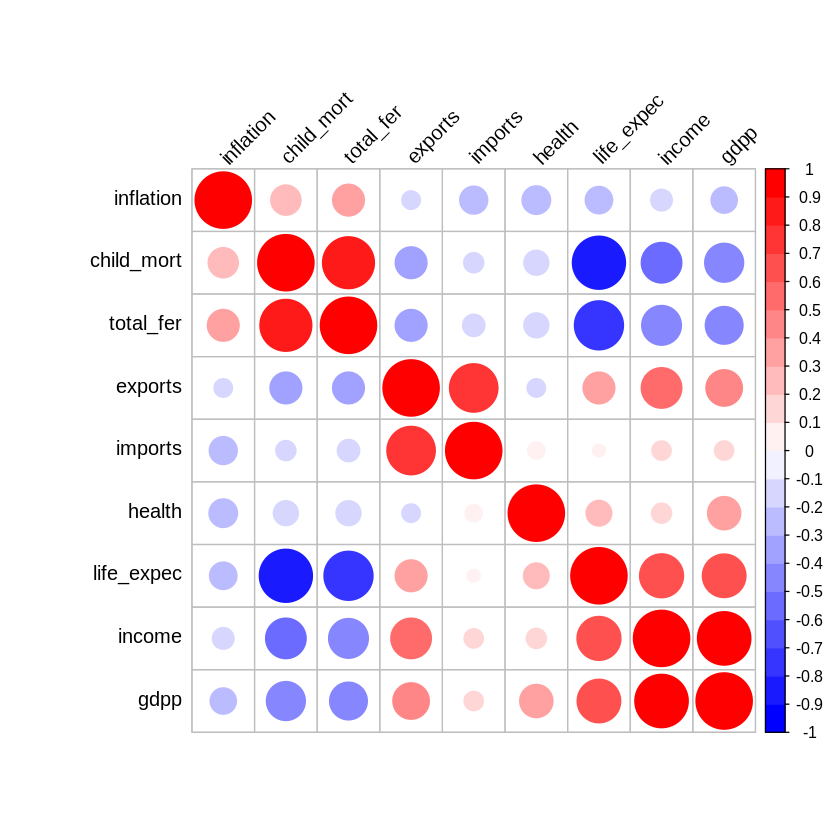

In [237]:
source("http://www.sthda.com/upload/rquery_cormat.r")

col<- colorRampPalette(c("blue", "white", "red"))(20)
rquery.cormat(countries.datan, type="full", col=col)

# **Checking for multiple Clusters**

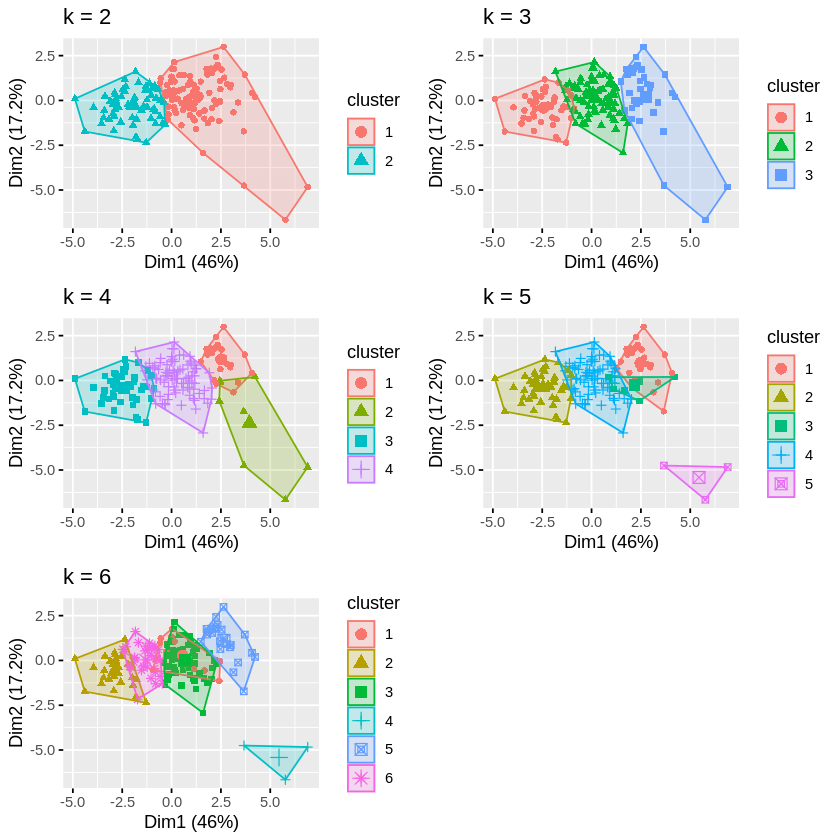

In [238]:
set.seed(123)

k2 <- kmeans(countries.datan, centers = 2, iter.max = 25, nstart = 1)
k3 <- kmeans(countries.datan, centers = 3, iter.max = 25, nstart = 1)
k4 <- kmeans(countries.datan, centers = 4, iter.max = 25, nstart = 1)
k5 <- kmeans(countries.datan, centers = 5, iter.max = 25, nstart = 1)
k6 <- kmeans(countries.datan, centers = 6, iter.max = 25, nstart = 1)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = countries.datan) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = countries.datan) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = countries.datan) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = countries.datan) + ggtitle("k = 5")
p5 <- fviz_cluster(k6, geom = "point",  data = countries.datan) + ggtitle("k = 6")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, p5, nrow = 3)

# **Checking for the appropiate number of clusters with the Elbow method**

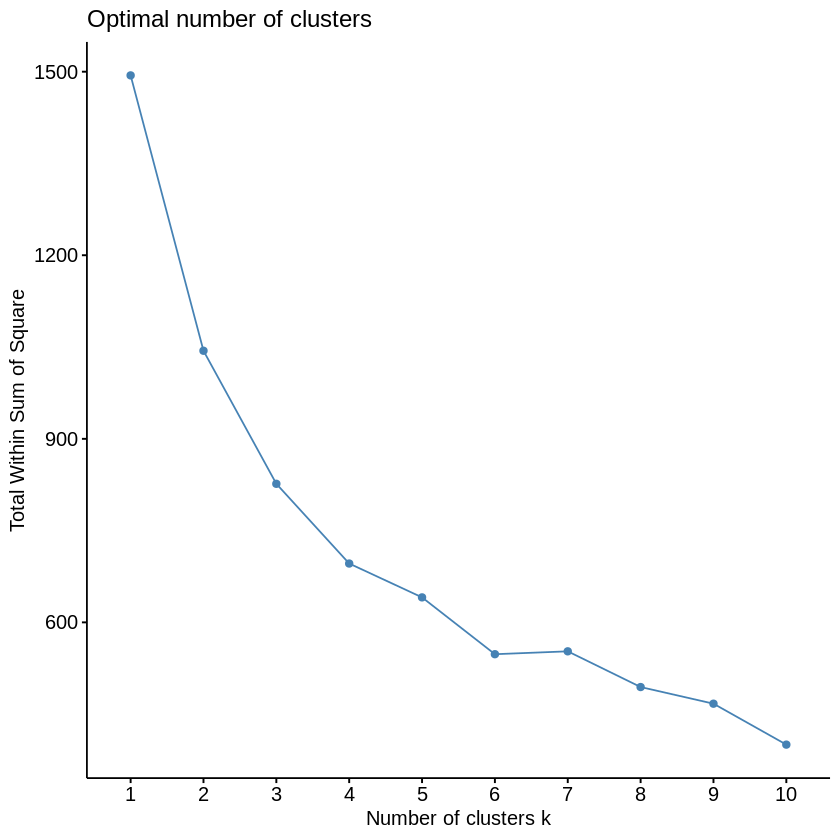

In [239]:
set.seed(123)
fviz_nbclust(countries.datan, kmeans, method = "wss")

# **Insights about the K choosed (K=3)**


### The countries will be separated in three groups:
> Countries that do not need international HELP


> Countries on the verge of needing international HELP


> Countries that definitely need international HELP


Lets clarify some features of this analysis before choosing  the groups:
* An higher inflation is bad
* An higher child mortality  is bad
* An lower income is bad












$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

[1] 36 84 47

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,-0.8249676,0.64314557,0.7252301,0.19006732,1.4797922,-0.48346661,1.0763414,-0.7895024,1.6111498
2,-0.4052346,-0.03155768,-0.2237978,0.02408916,-0.2510155,-0.01711594,0.2539698,-0.4230704,-0.3534185
3,1.3561391,-0.43622118,-0.1555163,-0.18863644,-0.6848344,0.40090504,-1.2783352,1.3608511,-0.6024306


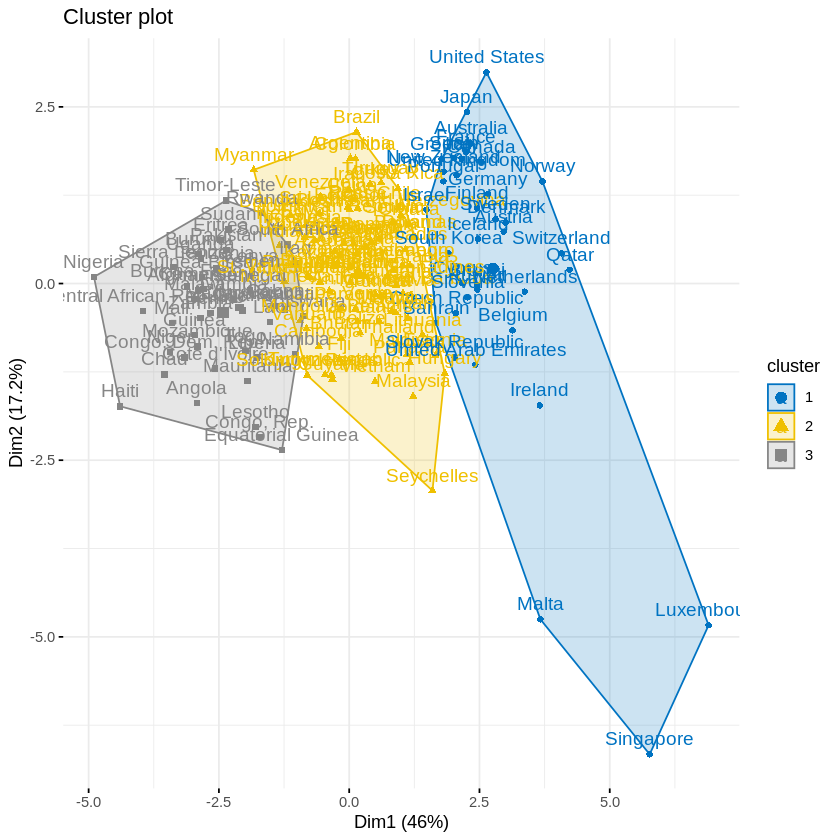

In [240]:
set.seed(123)
k3 <- kmeans(countries.datan, centers = 3, iter.max = 25, nstart = 1)
attributes(k3)
k3$size
k3$centers

p2 <-  fviz_cluster(k3, data = countries.datan,
             ellipse.type = "convex",
             palette = "jco",
             ggtheme = theme_minimal())
p2


In [241]:
countries.datan <- cbind(countries.datan, cluster = k3$cluster)
countries.datan <- cbind(countries.datan, label = k3$cluster)
countries.datan <- as.data.frame(countries.datan)

countries.datan[countries.datan$cluster==1,]$label <- "non"
countries.datan[countries.datan$cluster==2,]$label <- "verge"
countries.datan[countries.datan$cluster==3,]$label <- "need"

countries.datan$label <- factor(countries.datan$label)
countries.datan <- cbind(countries.datan, country = countries)

# **The countries that urgently need international aid are those highlighted in the gray area, cluster number 3.** 


In [242]:
countries <- countries.datan[countries.datan$cluster==3,]$country
countries

[1] Afghanistan              Angola                   Benin                   
 [4] Botswana                 Burkina Faso             Burundi                 
 [7] Cameroon                 Central African Republic Chad                    
[10] Comoros                  Congo, Dem. Rep.         Congo, Rep.             
[13] Cote d'Ivoire            Equatorial Guinea        Eritrea                 
[16] Gabon                    Gambia                   Ghana                   
[19] Guinea                   Guinea-Bissau            Haiti                   
[22] Iraq                     Kenya                    Kiribati                
[25] Lao                      Lesotho                  Liberia                 
[28] Madagascar               Malawi                   Mali                    
[31] Mauritania               Mozambique               Namibia                 
[34] Niger                    Nigeria                  Pakistan                
[37] Rwanda                   Senegal                  Sierra Leone            
[40] South Africa             Sudan                    Tanzania                
[43] Timor-Leste              Togo                     Uganda                  
[46] Yemen                    Zambia                  
167 Levels: Afghanistan Albania Algeria Angola Antigua and Barbuda ... Zambia


![texto alternativo](https://wittline.github.io/Data-Analytics-with-R/K-means/images/countries_cluster.jpg)


# **Implementing CART**

In [243]:
countries.datan$country <- NULL

In [244]:
set.seed(1234)
ind <- sample(x=c(1,2), size=nrow(countries.datan), replace=TRUE, prob=c(0.7, 0.3))
training.set <- countries.datan[ind==1,]
test.set <- countries.datan[ind==2,]

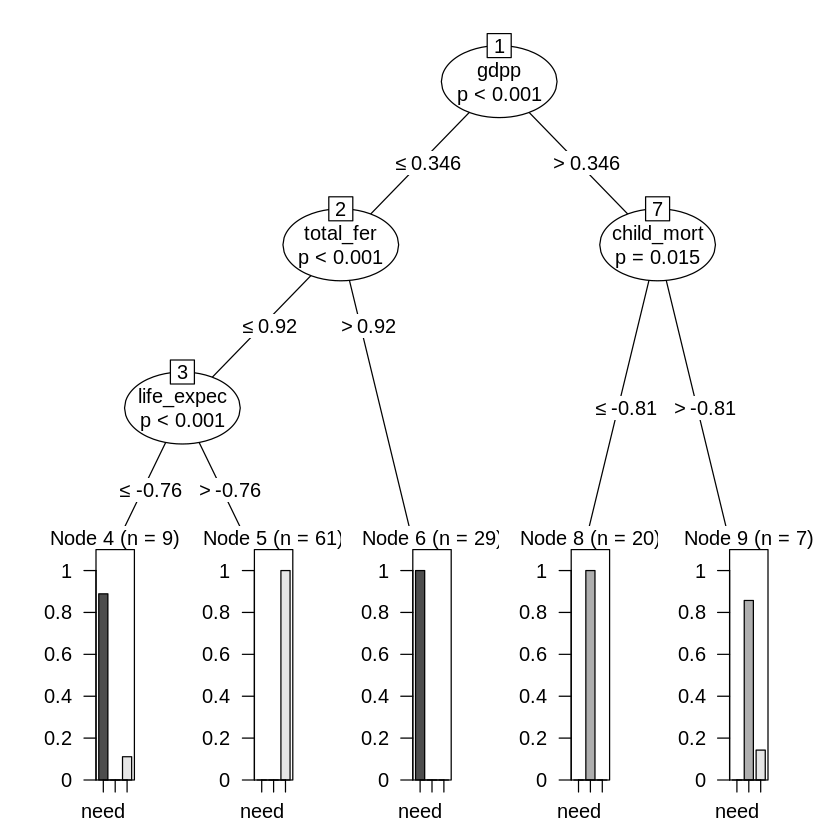

In [245]:
formula.1 <- label ~ child_mort + exports + health + imports + income + inflation + life_expec + total_fer + gdpp

countries_help.ctree <- ctree(formula = formula.1, data = training.set)

plot(countries_help.ctree)

In [246]:
train_predict <- predict(countries_help.ctree,training.set,type="response")
table(train_predict,training.set$label)

             
train_predict need non verge
        need    37   0     1
        non      0  26     1
        verge    0   0    61

In [247]:
error_rate <- mean(train_predict != training.set$label) * 100
accuracy <- (100 - error_rate)
accuracy

[1] 98.4127

In [248]:
test_predict <- predict(countries_help.ctree, newdata= test.set,type="response")
table(test_predict, test.set$label)
error_rate <- mean(test_predict != test.set$label) * 100
accuracy <- (100 - error_rate)
accuracy

            
test_predict need non verge
       need     9   0     1
       non      0   9     0
       verge    1   1    20

[1] 92.68293


![texto alternativo](https://wittline.github.io/Data-Analytics-with-R/K-means/images/cart_tree.jpg)